# Analysis of the results from dynamical cavity runs
This notebook load and combine the output files produced by the script `power.py`  to produce Figure 2. shown in the paper.

Output from ```power.py``` are saved in pickle files with name `"theta:"+str(theta)+specifier+".pkl"`.
Multiple outputs at the same theta are saved with different unique identifiers.
### Note
Using the default option of ```power.py```, code runs in a reasonable time but they won't show clear details as  in the article. To reproduce the results of the article please use ```power.py -N 200000 --Ts 0.01 1.1 0.01``` (a machine with several cores is recommended)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import pickle
from matplotlib.colors import LogNorm
from collections import OrderedDict
import os
import re
import sys
sys.path.insert(0, "lib")  # add the library folder to the path where I look for modules
import latexify



In [2]:
def load_obj(theta,specifier=''):
    name='theta:'+str(theta)+specifier+'.pkl'
    with open('./data/dic-' + name , 'rb') as f:
        return pickle.load(f)
def load_and_hist(theta,specifier):
    dic = load_obj(theta,specifier)
    Ts = dic['Ts']
    data = dic['data']
    img = []
    for i in range(len(Ts)):
        h,b = np.histogram(data[i],bins = np.linspace(0,1,401),density=True)
        img+=[h]
    return img,b,Ts


filenames=os.listdir("./data")
pattern = re.compile("dic-theta:\d*\.\d+|\d.pkl")

dictnames=[name  for name in filenames if pattern.match(name)]# select only dictionary files
print(' Results are available for the values of theta:')
thetas_avail = {filename.lstrip('dic-theta:').rstrip('.pkl').split('_',1)[0] for filename in dictnames}
for name in sorted(thetas_avail):
    print(name)
#for filename in dictnames:
#    print(filename)

 Results are available for the values of theta:
0.0


choose the parameter theta of interest and check if other files have been produced

In [3]:
theta = 0.
pattern2 = re.compile("dic-theta:"+str(theta)+"_+|\d.pkl")
suffix_list = [name.lstrip("dic-theta:"+str(theta)).rstrip('.pkl') for name in dictnames if pattern2.match(name)]
if  suffix_list:
    print(suffix_list)


Text(0, 0.5, '$dT$ (resolution)')

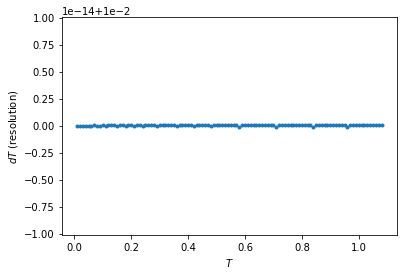

In [4]:
theta = 0.
if str(theta) not in thetas_avail:
    raise ValueError('Cannot find a simulation for theta = '+str(theta))
dic = load_obj(theta)
J = dic['J']
avg_degree = len(J.data) / J.shape[0]
img,b,Ts = load_and_hist(theta,'')
Ts = np.array(Ts)
img = np.array(img)

    
'''
#Un-commente these if you want to merge different simulations into one hearmap, 
#for instance you may want to have different  resolution of the noise strenght T.

a = dict(zip(Ts.round(4),img))
for suffix in  suffix_list:
    img_2,b,Ts_2 = load_and_hist(theta,suffix)
    a2 = dict(zip(Ts_2.round(4),img_2))
    a.update(a2)

a = OrderedDict(sorted(a.items()))
Ts = np.array(list(a.keys()))
img = np.array(list(a.values()))
plt.plot(Ts[:-1],np.diff(Ts),'.')

plt.xlabel('T')
plt.ylabel('Number of points/$\\Delta T$')
plt.title('Resolution of simulations in T')
plt.legend()
Ts = np.array(Ts)
'''
plt.plot(Ts[:-1],np.diff(Ts),'.')
plt.xlabel('$T$')
plt.ylabel('$dT$ (resolution)')

Theoretical lines are given by:
$$
\rho_+(p) = \frac{1}{2}\left[ 1-\tanh \frac{\beta\theta}{2}+p\left(\tanh\frac{\beta(J-\theta)}{2} +\tanh \frac{\beta\theta}{2}\right)\right]
$$
$$
\rho_-(p) = \frac{1}{2}\left[ 1-\tanh \frac{\beta\theta}{2}-p\left(\tanh\frac{\beta(J-\theta)}{2} +\tanh \frac{\beta\theta}{2}\right)\right]
$$
$p^*$ is the solution of the following equation: 
$$
p^* = \rho_+(p^*)
$$



In [5]:
cond_Tmax = Ts<1.1
img = np.array(img)[cond_Tmax,:]
Ts = Ts[cond_Tmax]

<ipython-input-6-48b8614c996c>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,np.array(img).T+0.01,norm = LogNorm(0.01,10),cmap ='inferno')
<ipython-input-6-48b8614c996c>:14: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cmap ='inferno',pad = 0.015)


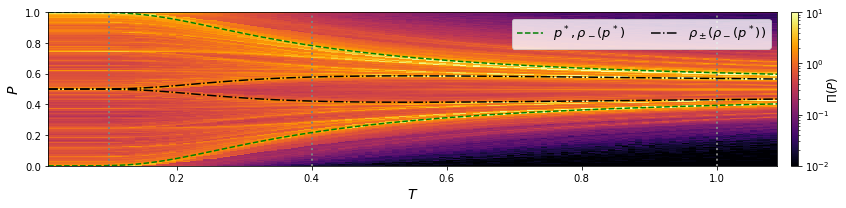

In [6]:
def plus(P):
    '''This is the rho_+ function'''
    return 0.5*(1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts)+P*(np.tanh((1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))
def minus(P):
    '''This is the rho_- function'''
    return 0.5*(1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts)+P*(np.tanh((-1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))

#this is p^*
x = (1-np.tanh(theta/np.sqrt(avg_degree)/2/Ts))/(2-(np.tanh((1-theta)/np.sqrt(avg_degree)/2/Ts)+np.tanh(theta/np.sqrt(avg_degree)/2/Ts)))

plt.figure(figsize = (13,3))
X,Y = np.meshgrid(Ts,b)
plt.pcolormesh(X,Y,np.array(img).T+0.01,norm = LogNorm(0.01,10),cmap ='inferno')
cbar = plt.colorbar(cmap ='inferno',pad = 0.015)
cbar.set_label("$\\Pi(P)$",rotation=90,fontsize=12,labelpad=-5)

plt.ylabel('$P$',fontsize = 14)
plt.xlabel('$T$',fontsize = 14)


plt.axvline(0.1,ls = ':',lw = 2,color = 'gray')
plt.axvline(0.4,ls = ':',lw = 2,color = 'gray')
plt.axvline(1.,ls = ':',lw = 2,color = 'gray')



plt.plot(Ts,x,'g--')
plt.plot(Ts,minus(x),'g--',label ='$p^*,\\rho_-(p^*)$')
plt.plot(Ts,minus(minus(x)),'k-.')
plt.plot(Ts,plus(minus(x)),'k-.',label ='$\\rho_\pm(\\rho_-(p^*))$')

plt.legend(fontsize = 13,ncol = 3)
plt.tight_layout()
#plt.savefig('./figures/T_dependence.pdf')

/home/giuseppe/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


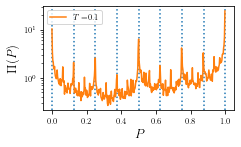

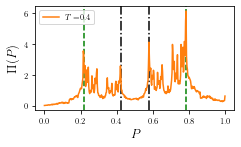

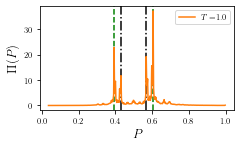

In [7]:
savefigures = False
latexify.latexify(columns = 2)
i = int(np.arange(len(Ts))[np.argmin(np.abs(Ts -0.1))])
[plt.axvline(0.5**3*j,ymin=0.,ls = ':',alpha =1) for j in range(9)]
plt.plot(b[:-1],img[i],label = '$T=$'+str(round(Ts[i],1)),c='#ff7f0e')
plt.semilogy()
#[plt.axvline(0.5+0.5**j,ymin=0.5,ls = '--',c = 'm') for j in range(1,5)]


plt.legend()
plt.xlabel('$P$',fontsize = 13)
plt.ylabel('$\\Pi(P)$',fontsize = 13)
plt.tight_layout()
if savefigures:
    plt.savefig('./figures/T_'+str(round(Ts[i],1))+'.pdf')
plt.figure()


i = int(np.arange(len(Ts))[np.argmin(np.abs(Ts -0.4))])
plt.axvline(x[i],ls ='--',c='g')
plt.axvline(minus(x)[i],ls ='--',c='g')
plt.axvline(minus(minus(x))[i],ls ='-.',c='k')
plt.axvline(plus(minus(x))[i],ls ='-.',c='k')

plt.plot(b[:-1],img[i],label = '$T=$'+str(round(Ts[i],1)),c='#ff7f0e')
plt.legend()
np.count_nonzero(J.data>0)/len(J.data),np.sort(img[i])[-2]/np.sort(img[i])[-1]
plt.xlabel('$P$',fontsize = 13)
plt.ylabel('$\\Pi(P)$',fontsize = 13)
plt.tight_layout()

if savefigures:
    plt.savefig('./figures/T_'+str(round(Ts[i],1))+'.pdf')
plt.figure()



i = int(np.arange(len(Ts))[np.argmin(np.abs(Ts -1.))])
plt.axvline(x[i],ls ='--',c='g')
plt.axvline(minus(x)[i],ls ='--',c='g')
plt.axvline(minus(minus(x))[i],ls ='-.',c='k')
plt.axvline(plus(minus(x))[i],ls ='-.',c='k')


plt.plot(b[:-1][img[i]>0],img[i][img[i]>0],label = '$T=$'+str(round(Ts[i],1)),c='#ff7f0e')
plt.legend()



plt.xlabel('$P$',fontsize = 13)
plt.ylabel('$\\Pi(P)$',fontsize = 13)
plt.tight_layout()
if savefigures:
    plt.savefig('./figures/T_'+str(round(Ts[i],1))+'.pdf')
